## Preprocessing

In [74]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [75]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME','INCOME_AMT','SPECIAL_CONSIDERATIONS'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,142590,1
...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,5000,1


In [76]:
# Determine the number of unique values in each column.
unique_values = application_df.nunique()
unique_values

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [77]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_value_counts = application_df['APPLICATION_TYPE'].value_counts()
application_type_value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [78]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 300  
application_types_to_replace = application_type_value_counts[application_type_value_counts < cutoff].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [79]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_type_value_counts = application_df['CLASSIFICATION'].value_counts()
print(application_type_value_counts)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64


In [80]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_count_values = application_df['CLASSIFICATION'].value_counts()
classification_kept = classification_count_values[classification_count_values > 1].index.tolist()
classification_count_values.head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [81]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = classification_count_values[classification_count_values<= 1000].index.tolist()##HELP

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [82]:
# Convert categorical data to numeric with `pd.get_dummies`
application_encoded_df = pd.get_dummies(application_df, columns=['APPLICATION_TYPE'], drop_first=True)
application_encoded_df.head()

,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8
0,Independent,C1000,ProductDev,Association,1,5000,1,1,0,0,0,0,0,0,0
1,Independent,C2000,Preservation,Co-operative,1,108590,1,0,0,1,0,0,0,0,0
2,CompanySponsored,C3000,ProductDev,Association,1,5000,0,0,0,0,0,1,0,0,0
3,CompanySponsored,C2000,Preservation,Trust,1,6692,1,0,0,1,0,0,0,0,0
4,Independent,C1000,Heathcare,Trust,1,142590,1,0,0,1,0,0,0,0,0


In [83]:
#Convert categorical data to numeric with pd.get_dummies
numeric_application_df = pd.get_dummies(application_df,dtype=float)
numeric_application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [84]:
# Split our preprocessed data into our features and target arrays
X = numeric_application_df.drop('IS_SUCCESSFUL', axis=1).values
y = numeric_application_df['IS_SUCCESSFUL'].values  

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30) 

In [85]:
print(X_train)

[[1.000000e+00 5.000000e+03 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.000000e+00 5.000000e+03 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.000000e+00 5.000000e+03 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [1.000000e+00 1.148719e+06 0.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [1.000000e+00 7.922133e+06 0.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]
 [1.000000e+00 1.307100e+04 0.000000e+00 ... 0.000000e+00 0.000000e+00
  1.000000e+00]]


In [86]:
# Create a StandardScaler instances
scaler = StandardScaler() 

# Fit the StandardScaler
X_scaler = scaler.fit(X_train) 

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [92]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 80)             │         2,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,101 (19.93 KB)

 Trainable params: 5,101 (19.93 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [89]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 301us/step - accuracy: 0.7010 - loss: 0.5914
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.7293 - loss: 0.5603
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.7308 - loss: 0.5588
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.7344 - loss: 0.5529
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step - accuracy: 0.7288 - loss: 0.5576
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7279 - loss: 0.5615
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 300us/step - accuracy: 0.7320 - loss: 0.5541
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 292us/step - accuracy: 0.7298 - loss: 0.5584
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7338 - loss: 0.5506
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.7325 - loss: 0.5519
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.7296 - loss: 0.5516
Epoch 12/100
804/80

In [90]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 371us/step - accuracy: 0.7234 - loss: 0.5681
Loss: 0.5680997371673584, Accuracy: 0.7233819365501404


In [91]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization1.h5")

<Axes: >

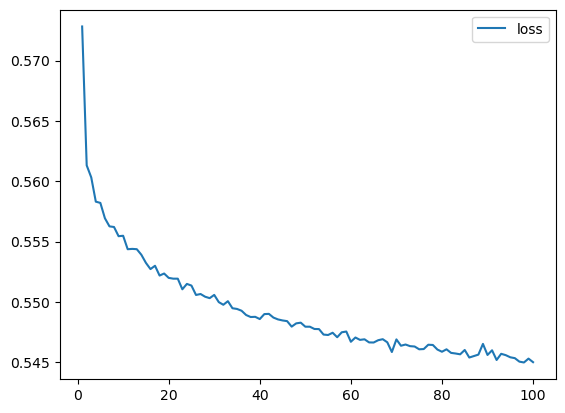

In [94]:
#Bonus
# Create a DataFrame containing training history
alphabet_soup_optimization1_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
alphabet_soup_optimization1_df.index += 1

# Plot the loss
alphabet_soup_optimization1_df.plot(y="loss")

<Axes: >

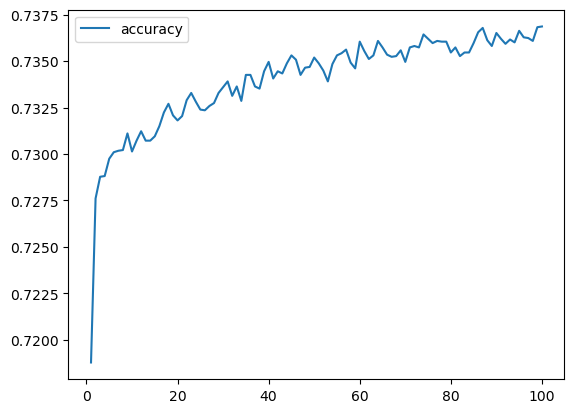

In [95]:
#Bonus
# Plot the accuracy
alphabet_soup_optimization1_df.plot(y="accuracy")